<h1>Relatório da Disciplina EEL891 - Introdução ao Aprendizado de Máquina</h1>
Aluno: João Felipe Guedes da Silva
Período: 2018.2
ID Kaggle: 1205540 
DRE: 113079506

Este relatório tem como objetivo apresentar o estudo de aprendizado de máquina aplicado à previsão do preço de imóveis. O dataset em questão foi disponibilizado em https://www.kaggle.com/c/eel891-2018-2-t1. 

O relatório é composto das seguintes seções:
1. **Importação de bibliotecas**
<br>Salvo as bibliotecas utilizadas para importação dos modelos, todas as bibliotecas utilizadas neste relatório são importadas na seção 1.     
2. **Carregamento de dataset**
<br>O dataset disponibilizado no link <a href="https://www.kaggle.com/c/eel891-2018-2-t1">acima</a> foi baixado para a pasta /Dataset/. Ele é composto por um arquivo train.csv para o conjunto de treino, contendo 20 <i>features</i> dos imóveis e 1 <i>target</i> com o preço do mesmo, e outro test.csv contendo apenas as <i>features</i> para o conjunto de testes. 
3. **Pre-processamento**
<br>A etapa de pré-processamento é realizada separadamente para cada tipo de <i>feature</i> encontrada no dataset. Dentre os tipos, lista-se: <br>
    - **Variáveis categóricas**: em geral, algumas categorias foram agrupadas por não apresentarem uma quantidade significante de amostras. Das categorias que foram mantidas, todas foram codificadas utilizando a notação maximamente esparsa através da função <i>get_dummies</i> da biblioteca <i>pandas</i>. 
    <br>Aqui nota-se a análise diferenciada para a variável **bairros**, a qual não só possui muitas categorias, como também apresentou categorias existentes no conjunto de teste que não estavam no conjunto de treinamento (e vice-versa). Para reduzir o impacto do elevado número de categorias, os bairros foram clusterizados utilizando o algoritmo k-means e a variável de saída, a fim de clusterizar bairros de imóveis com preços similares.
    
    - **Variáveis numéricas não-binárias**: em geral, essas variáveis foram normalizadas para apresentarem distribuição mais próxima possível de uma gaussiana. A análise dessa proximidade foi feita através da curtose da distribuição de cada variável antes e depois da normalização. 
    - **Variáveis numéricas binárias**: não encontrou-se necessidade de tratar tais variáveis.
    
    <br>Ambas as variáveis numéricas foram tratadas para conterem a menor quantidade possível de <i>outliers</i>. Para tal, utilizou-se <i>thresholds</i> em cada uma delas os quais foram definidos empiricamente. 
    
     <br>Após todo o processamento feito em cima dos tipos de variáveis, uma análise da correlação entre as mesmas foi realizada a fim de eliminar variáveis de entrada muito correlacionadas entre si. Dentre essas, manteve-se apenas a variável com maior correlação com a saída. 
  
4. **Treinamento dos modelos**
    <br>Os modelos utilizados como base para este estudo foram os modelos lineares de regressão encontrados na biblioteca sklearn, os quais podem ser acessados <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">aqui</a>. Os valores <i>default</i> dos parâmetros de cada modelo foram utilizados. 

    Para avaliação dos modelos, utilizou-se o <i>Root Mean Squared Percentage Error</i> seguindo a métrica de avaliação da competição proposta na disciplina. 
    
    Feito o treinamento individual dos modelos, a saída prevista de cada um deles foi utilizada para gerar a entrada de um <i>ensemble</i> dos mesmos. A escolha do modelo <i>ensemble</i> teve como critério o modelo que melhor desempenhou no treinamento individual. Por fim, a saída deste modelo <i>ensemble</i> foi a gerada para submissão do conjunto de testes da competição. 

5. **Submissão**

    <br>Nesta etapa, um arquivo **submission.csv** é gerado para submissão na competição da disciplina. O arquivo contém o Id do imóvel do conjunto de teste seguido do valor de imóvel previsto para o mesmo. 
    <br>
____________________

<h3>Resultados</h3>

Os modelos foram avaliados utilizando-se a técnica de validação cruzada e o RMSPE médio com seu desvio padrão para um total de 10 folds foram calculados. O modelo a ser escolhido para o ensemble foi o Random Forest, que apresentou um RMSPE de 0.114923 para o conjunto de validação. 

O resultado do ensemble utilizando 10 folds de validação cruzada foi de 0.130741 +/- 0.037786 para o conjunto de validação. No entanto, este resultado não se verificou para 50% do conjunto de testes avaliado previamente na competição, que chegou a 0.26 na melhor submissão. 

<h3>Conclusão</h3>

A etapa de pré-processamento se mostrou de considerável importância para a eficiência do preditor. Em especial, sugere-se uma automatização da escolha dos <i>thresholds</i> para que o melhor conjunto de hiperparâmetros seja encontrado para o problema em questão. 

Além dos parâmetros de pré-processamento, sugere-se uma análise mais profunda dos parâmetros de cada modelo para que, individualmente, eles possam gerar previsões melhores. 

Para trabalhos futuros, a adição de redes neurais como modelos de treinamento mostra-se uma abordagem interessante para mapear modelos mais robustos ou até não-lineares para a previsão do preço de imóveis. 

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

## 2. Carregando o dataset

In [2]:
dataset_dir = './Dataset/'
train_set = pd.read_csv(dataset_dir + 'train.csv')
test_set = pd.read_csv(dataset_dir + 'test.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 21 columns):
Id                4683 non-null int64
tipo              4683 non-null object
bairro            4683 non-null object
tipo_vendedor     4683 non-null object
quartos           4683 non-null int64
suites            4683 non-null int64
vagas             4683 non-null int64
area_util         4683 non-null int64
area_extra        4683 non-null int64
diferenciais      4683 non-null object
churrasqueira     4683 non-null int64
estacionamento    4683 non-null int64
piscina           4683 non-null int64
playground        4683 non-null int64
quadra            4683 non-null int64
s_festas          4683 non-null int64
s_jogos           4683 non-null int64
s_ginastica       4683 non-null int64
sauna             4683 non-null int64
vista_mar         4683 non-null int64
preco             4683 non-null float64
dtypes: float64(1), int64(16), object(4)
memory usage: 768.4+ KB


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
Id                2000 non-null int64
tipo              2000 non-null object
bairro            2000 non-null object
tipo_vendedor     2000 non-null object
quartos           2000 non-null int64
suites            2000 non-null int64
vagas             2000 non-null int64
area_util         2000 non-null int64
area_extra        2000 non-null int64
diferenciais      2000 non-null object
churrasqueira     2000 non-null int64
estacionamento    2000 non-null int64
piscina           2000 non-null int64
playground        2000 non-null int64
quadra            2000 non-null int64
s_festas          2000 non-null int64
s_jogos           2000 non-null int64
s_ginastica       2000 non-null int64
sauna             2000 non-null int64
vista_mar         2000 non-null int64
dtypes: int64(16), object(4)
memory usage: 312.6+ KB


## 3. Pré-processamento

O dataset não possui valores faltantes e, portanto, tal etapa não será realizada. 

Ao todo, o dataset possui 21 variáveis, das quais podem ser separadas em:
- 4 Variáveis de entrada categóricas: tipo, bairro, tipo_vendedor, diferenciais
- 5 Variáveis de entrada numéricas não-binárias: quartos, suites, vagas, area_util, area_extra
- 10 Variáveis de entrada numéricas binárias: churrasqueira, estacionamento, piscina, playground, quadra, s_festas, s_jogos, s_ginastica, sauna, vista_mar
- 1 Variável de saída numérica: preco

A variável **Id** não possui valor quantitativo para o problema por se tratar de um identificador e, portanto, será continuamente removida das análises. 

O pré-processamento de cada um dos conjuntos de variáveis será realizado separadamente.


In [5]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4683, 21)
Test shape:  (2000, 20)


### 3.0 Transformação Variável Saída

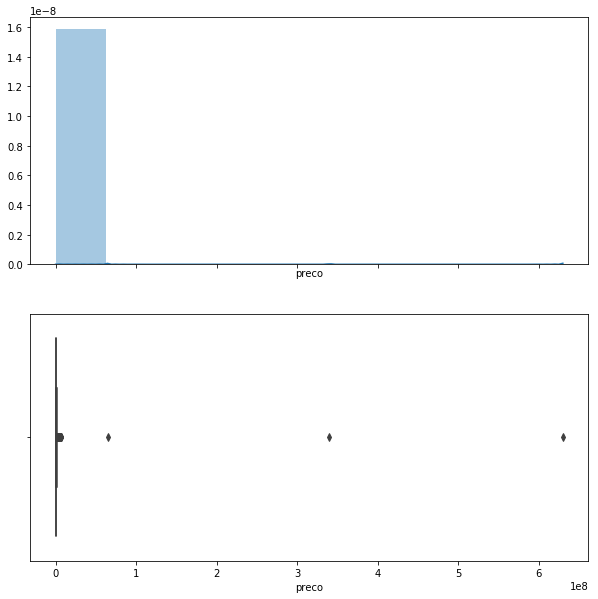

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['preco'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['preco'], ax = axes[1])

In [7]:
preco_thr = 1.50*np.power(10, 6)
train_set = train_set[train_set['preco'] < preco_thr]

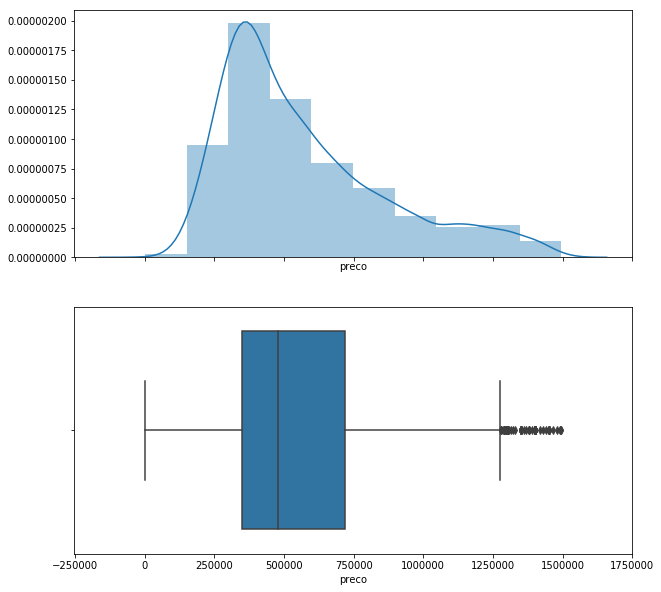

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['preco'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['preco'], ax = axes[1])

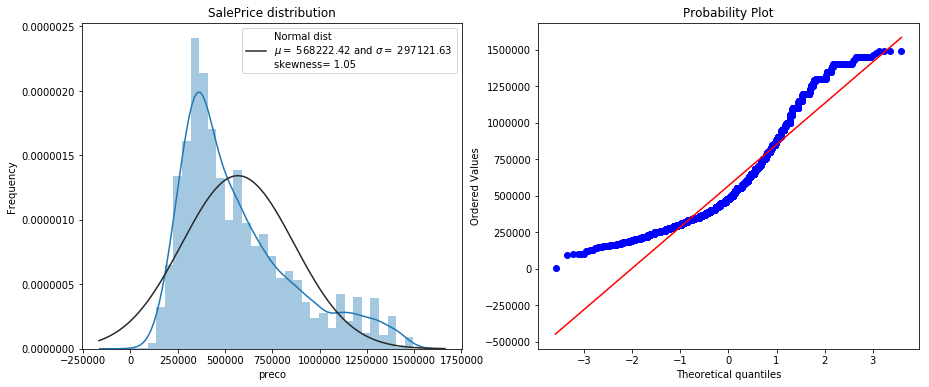

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(train_set['preco'], fit = norm, ax = axes[0]);
(mu, sigma) = norm.fit(train_set['preco'])

axes[0].legend(['Normal dist \n$\mu=$ {:.2f} and $\sigma=$ {:.2f} \nskewness= {:.2f}'
                                    .format(mu, sigma, skew(train_set['preco']))],
                loc='best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('SalePrice distribution')

stats.probplot(train_set['preco'], plot = axes[1])
plt.show()

Podemos perceber que a variável alvo não se aproxima da distribuição normal, e tem uma cauda longa para a direita. É recomendável realizar uma transformação nos dados para aproximá-los de uma gaussiana, o que costuma melhorar a performance dos modelos. Para isso, será utilizada a transformação logp1. Como o desafio no kaggle avalia o RMSLE, ao realizar esta transformação na saída, podemos avaliar os modelos utilizando o RMSE como métrica de erro, sem se preocupar em fazer a transformação inversa da variável, a parcela log já foi aplicada.

In [10]:
train_set['preco'] = np.log1p(train_set['preco'])

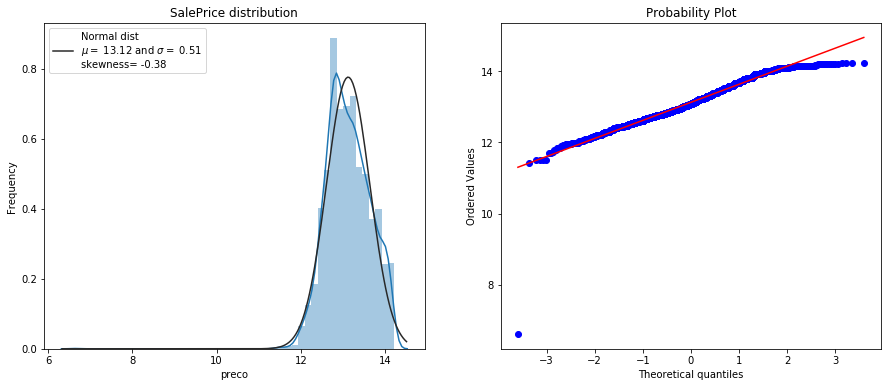

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(train_set['preco'], fit = norm, ax = axes[0]);

(mu, sigma) = norm.fit(train_set['preco'])
axes[0].legend(['Normal dist \n$\mu=$ {:.2f} and $\sigma=$ {:.2f}\nskewness= {:.2f}'
                                                .format(mu, sigma, skew(train_set['preco']))],
               loc='best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('SalePrice distribution')

res = stats.probplot(train_set['preco'], plot = axes[1])
plt.show()

In [12]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4308, 21)
Test shape:  (2000, 20)


### 3.1 Transformação de variável categórica em numérica

#### 3.1.1 Tipo
Como a quantidade de ocorrências dos tipos Apartamento e Casa são muito maiores do que Quitinete e Loft, esta variável será transformada em uma variável binária onde **1** é o tipo apartamento e **0** é o tipo não-apartamento (Casa, Quitinete ou Loft)

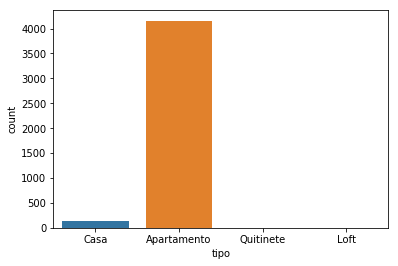

In [13]:
sns.countplot(x='tipo', data=train_set);
#plt.xticks(rotation=45);

In [14]:
replace_dict = {'Casa':0, 'Quitinete':0, 'Loft':0, 'Apartamento': 1}

train_set['tipo'] = train_set['tipo'].replace(replace_dict)
test_set['tipo'] = test_set['tipo'].replace(replace_dict)

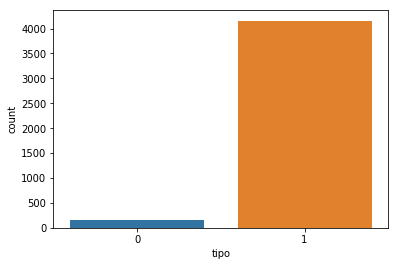

In [15]:
sns.countplot(x='tipo', data=train_set);

In [16]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4308, 21)
Test shape:  (2000, 20)


#### 3.1.2 Bairro

Pela do bairro, podemos ver que temos 66 bairros diferentes sendo que o bairro mais frequente é Boa Viagem (1599 ocorrências). Como esta variável deve ser binarizada, ela sozinha geraria 66 variáveis a mais para o modelo, todas informando apenas qual bairro o imóvel se encontra. 

Para reduzir o número de variáveis, traçaremos um threshold definindo os bairros que não possuem quantidade expressiva de ocorrências. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

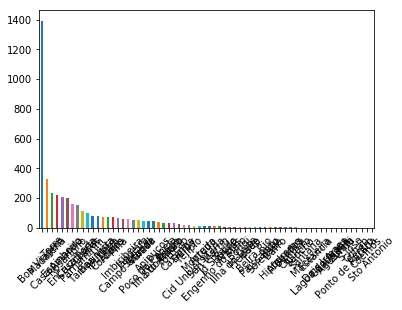

In [17]:
train_set['bairro'].value_counts().plot(kind="bar")
plt.xticks(rotation=45)

#### Clusterização dos bairros

In [18]:
train_set['bairro'] = train_set['bairro'].apply(lambda x: x.replace(' ', '_').lower())
test_set['bairro'] = test_set['bairro'].apply(lambda x: x.replace(' ', '_').lower())

In [19]:
df_train_bairros = pd.get_dummies(train_set['bairro'], prefix='bairro')
df_test_bairros = pd.get_dummies(test_set['bairro'], prefix='bairro')

In [20]:
# Making sure test set has all columns of train set except for preco
for column in df_train_bairros.columns:
    if column not in df_test_bairros.columns and column != 'preco':
        df_test_bairros[column] = 0

for column in df_test_bairros.columns:
    if column not in df_train_bairros.columns:
        df_train_bairros[column] = 0

In [21]:
df_train_bairros['preco'] = train_set['preco']

In [22]:
from sklearn.cluster import KMeans 
n_clusters = 20

kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
kmeans.fit(df_train_bairros.drop(['preco'], axis = 1), df_train_bairros['preco'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
df_train_clusters = pd.DataFrame()
df_train_clusters['clusters'] = kmeans.labels_
df_train_clusters['preco'] = df_train_bairros['preco']

In [24]:
train_set['bairro'] = kmeans.predict(df_train_bairros.drop(['preco'], axis = 1))
test_set['bairro'] = kmeans.predict(df_test_bairros)

In [25]:
train_set = pd.concat([train_set, pd.get_dummies(train_set['bairro'], prefix='bairro')], axis=1)
train_set.drop(['bairro'], axis = 1, inplace = True)
test_set = pd.concat([test_set, pd.get_dummies(test_set['bairro'], prefix='bairro')], axis=1)
test_set.drop(['bairro'], axis = 1, inplace = True)

In [26]:
# Making sure test set has all columns of train set except for preco
for column in train_set.columns:
    if column not in test_set.columns and column != 'preco':
        test_set[column] = 0

for column in test_set.columns:
    if column not in train_set.columns:
        train_set[column] = 0

In [27]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4308, 40)
Test shape:  (2000, 39)


#### 3.1.3 Tipo Vendedor
Como só há 2 tipos de vendedores (Imobiliária e Pessoa Física), categorizaremos essa variável da seguinte forma: 
- 0: Imobiliária
- 1: Pessoa Física

(array([0, 1]), <a list of 2 Text xticklabel objects>)

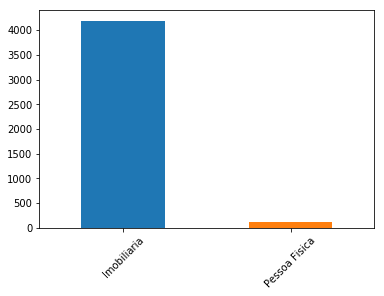

In [28]:
train_set['tipo_vendedor'].value_counts().plot(kind="bar")
plt.xticks(rotation=45)

In [29]:
replace_dict = {'Imobiliaria':0, 'Pessoa Fisica': 1}

train_set['tipo_vendedor'] = train_set['tipo_vendedor'].replace(replace_dict)
test_set['tipo_vendedor'] = test_set['tipo_vendedor'].replace(replace_dict)

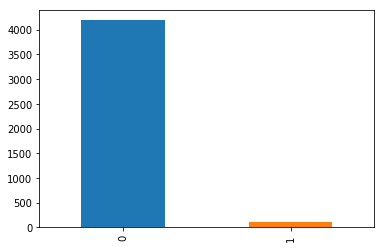

In [30]:
train_set['tipo_vendedor'].value_counts().plot(kind="bar")

#### 3.1.4 Diferenciais
De acordo com a descrição do dataset, as variáveis numéricas binárias contém a informação de existência ou inexistência de uma palavra na variável diferenciais. Portanto, a informação semântica desta variável já está contida em outras variáveis e, por isso, ela não será utilizada no treinamento.

In [ ]:
# itens_binarizados = ['churrasqueira', 'estacionamento', 'piscina', 
#              'playground', 'quadra', 's_festas', 
#              's_jogos', 's_ginastica', 'sauna', 'vista_mar']
# separador_diferenciais = lambda x: pd.Series([str(i).lower() for i in reversed(x.split(' e '))])
# # diferenciais = train_set['diferenciais'].apply(separador_diferenciais)
# diferenciais_unicos = np.array([])
# for dif_index in diferenciais.columns:
#     diferenciais_unicos = np.append(diferenciais_unicos, diferenciais[dif_index].unique(), axis = 0)        
# diferenciais_unicos = np.array(['nenhum' if x is np.nan else x for x in diferenciais_unicos])
# diferenciais_unicos = np.unique(diferenciais_unicos)
# for diferencial in diferenciais_unicos:
#     if diferencial not in itens_binarizados:
#         train_set['dif_' + str(diferencial)] = train_set['diferenciais'].apply(lambda x: 1 if diferencial in x else 0)
#         test_set['dif_' + str(diferencial)] = test_set['diferenciais'].apply(lambda x: 1 if diferencial in x else 0)
# train_set.drop(['diferenciais'], axis = 1, inplace = True)
# test_set.drop(['diferenciais'], axis = 1, inplace = True)

In [31]:
train_set.drop(['diferenciais'], axis = 1, inplace = True)
test_set.drop(['diferenciais'], axis = 1, inplace = True)

In [32]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4308, 39)
Test shape:  (2000, 38)


### 3.2 Transformação Variáveis Numéricas Não-Binárias

quartos, suites, vagas, area_util, area_extra

In [33]:
numerical_colnames = ['quartos', 'suites', 'vagas', 'area_util', 'area_extra']
train_set[numerical_colnames].describe()

,quartos,suites,vagas,area_util,area_extra
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,2.954503,1.276230,1.577530,110.428041,11.938719
std,0.827477,0.942666,1.094672,91.048928,275.713843
min,1.000000,0.000000,0.000000,21.000000,0.000000
25%,3.000000,1.000000,1.000000,65.000000,0.000000
50%,3.000000,1.000000,1.000000,90.000000,0.000000
75%,3.000000,1.000000,2.000000,132.000000,0.000000
max,9.000000,6.000000,30.000000,2045.000000,17450.000000


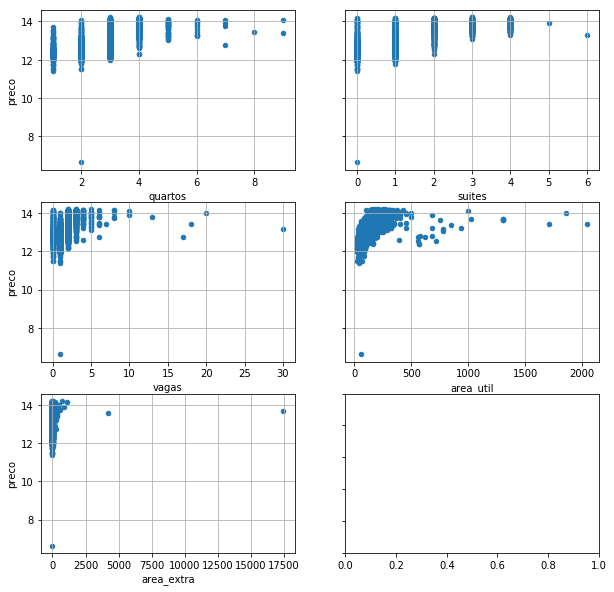

In [34]:
data = pd.concat([train_set['preco'], train_set[numerical_colnames]], axis=1)
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i in range(len(numerical_colnames)):
    data.plot.scatter(x = numerical_colnames[i], y = 'preco', ax = axes[i//2, i%2], 
                      sharey = True, grid = True)

#### 3.2.1 Quartos

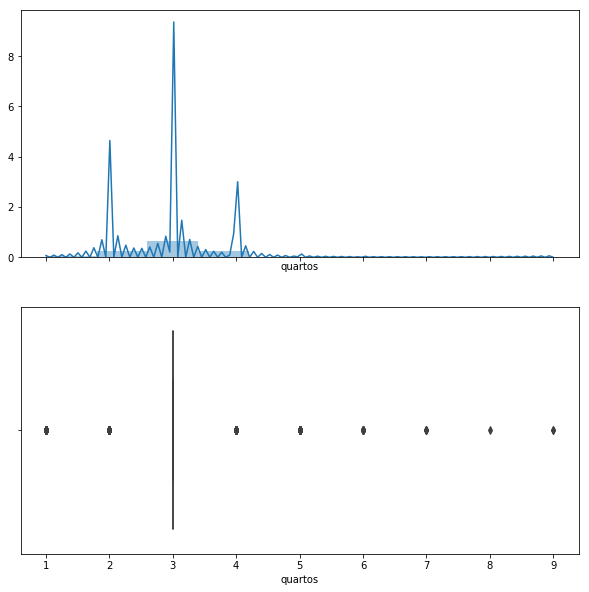

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['quartos'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['quartos'], ax = axes[1])

In [36]:
quartos_thr = 5
train_set = train_set[train_set['quartos'] < quartos_thr]

In [37]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4255, 39)
Test shape:  (2000, 38)


#### 3.3.2 Suites

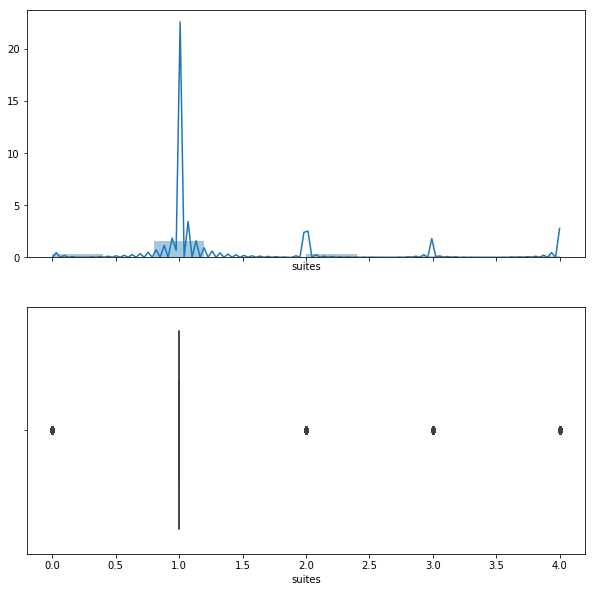

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['suites'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['suites'], ax = axes[1])

In [39]:
suites_thr = 5
train_set = train_set[train_set['suites'] < suites_thr]

In [40]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4255, 39)
Test shape:  (2000, 38)


#### 3.3.3 Vagas

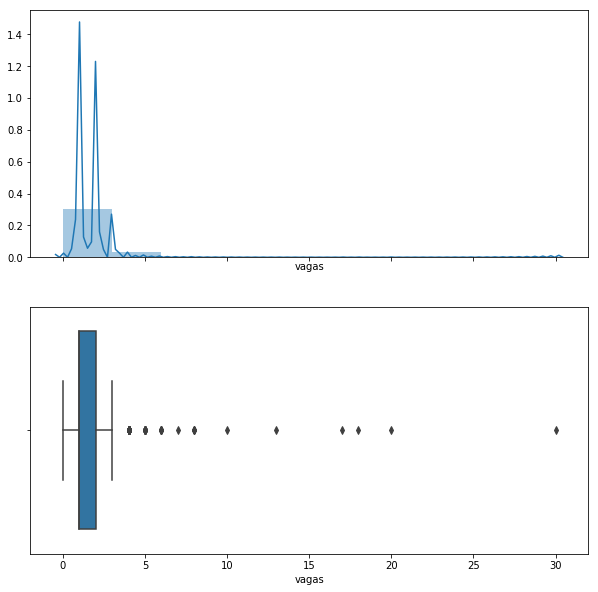

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['vagas'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['vagas'], ax = axes[1])

In [42]:
vagas_thr = 5
train_set = train_set[train_set['vagas'] < vagas_thr]

In [43]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4225, 39)
Test shape:  (2000, 38)


#### 3.3.4 Area Util

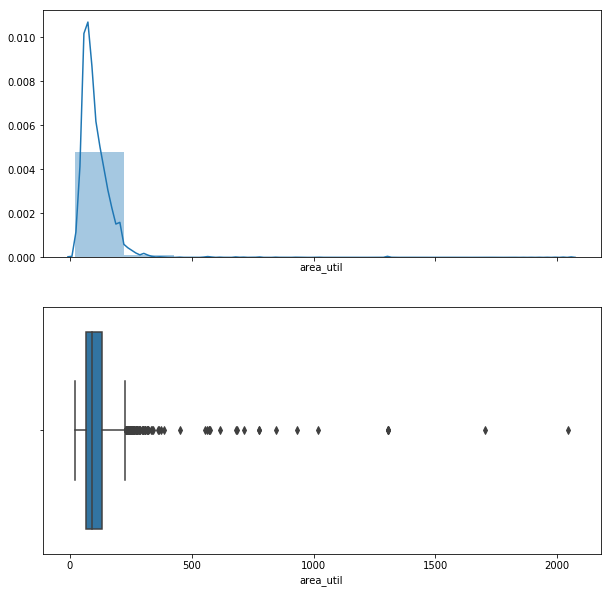

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['area_util'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['area_util'], ax = axes[1])

In [45]:
area_util_thr = 400
train_set = train_set[train_set['area_util'] < area_util_thr]

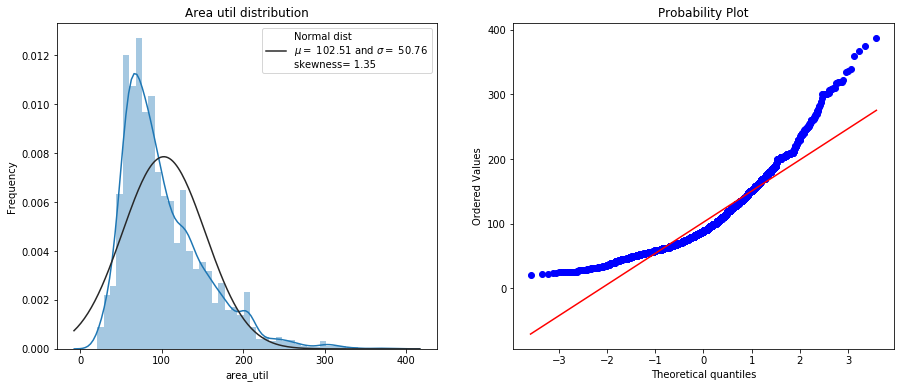

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(train_set['area_util'], fit = norm, ax = axes[0]);

(mu, sigma) = norm.fit(train_set['area_util'])
axes[0].legend(['Normal dist \n$\mu=$ {:.2f} and $\sigma=$ {:.2f}\nskewness= {:.2f}'
                                                .format(mu, sigma, skew(train_set['area_util']))],
               loc='best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Area util distribution')

res = stats.probplot(train_set['area_util'], plot = axes[1])
plt.show()

In [48]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4204, 39)
Test shape:  (2000, 38)


#### 3.3.5 Area Extra

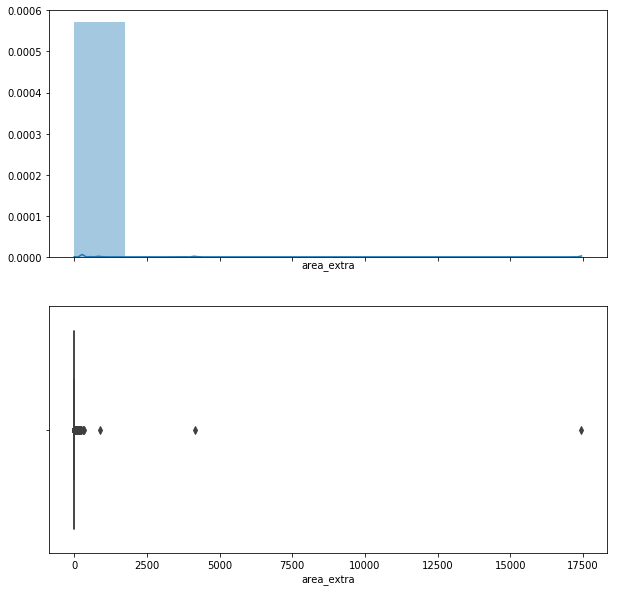

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['area_extra'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['area_extra'], ax = axes[1])

In [50]:
area_extra_thr = 150
train_set = train_set[train_set['area_extra'] < area_extra_thr]

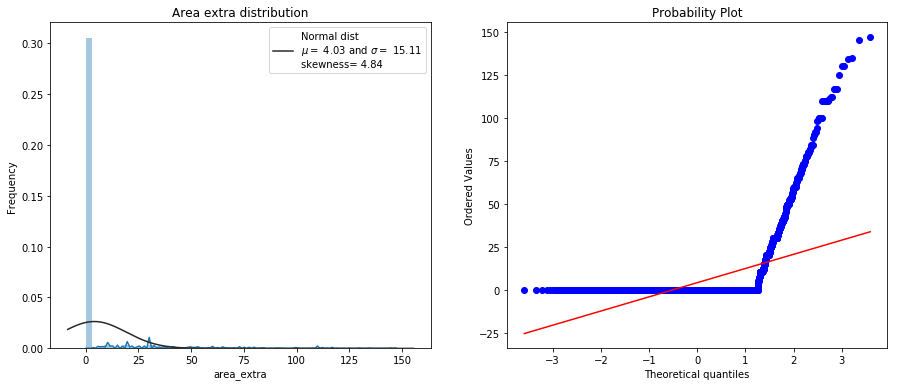

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(train_set['area_extra'], fit = norm, ax = axes[0]);

(mu, sigma) = norm.fit(train_set['area_extra'])
axes[0].legend(['Normal dist \n$\mu=$ {:.2f} and $\sigma=$ {:.2f}\nskewness= {:.2f}'
                                                .format(mu, sigma, skew(train_set['area_extra']))],
               loc='best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Area extra distribution')

res = stats.probplot(train_set['area_extra'], plot = axes[1])
plt.show()

In [52]:
train_set['area_extra'] = np.log1p(train_set['area_extra'])
test_set['area_extra'] = np.log1p(test_set['area_extra'])

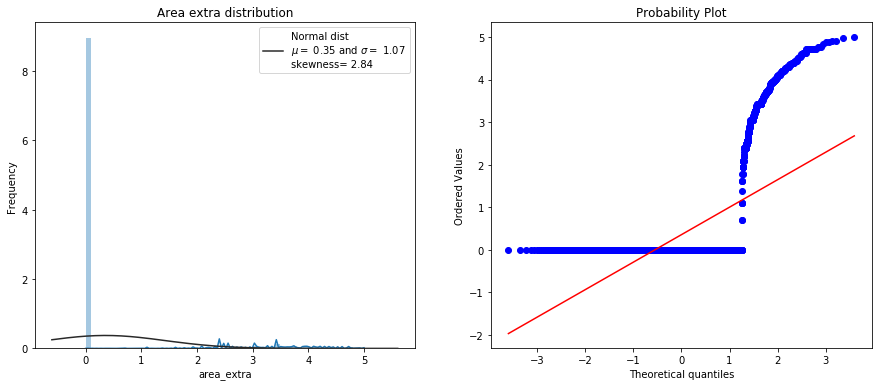

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(train_set['area_extra'], fit = norm, ax = axes[0]);

(mu, sigma) = norm.fit(train_set['area_extra'])
axes[0].legend(['Normal dist \n$\mu=$ {:.2f} and $\sigma=$ {:.2f}\nskewness= {:.2f}'
                                                .format(mu, sigma, skew(train_set['area_extra']))],
               loc='best')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Area extra distribution')

res = stats.probplot(train_set['area_extra'], plot = axes[1])
plt.show()

In [54]:
numerical_colnames = ['quartos', 'suites', 'vagas', 'area_util', 'area_extra']
train_set[numerical_colnames].describe()

,quartos,suites,vagas,area_util,area_extra
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,2.916149,1.266364,1.509078,102.214047,0.354931
std,0.771903,0.933385,0.765467,50.497648,1.070384
min,1.000000,0.000000,0.000000,23.000000,0.000000
25%,2.000000,1.000000,1.000000,65.000000,0.000000
50%,3.000000,1.000000,1.000000,89.000000,0.000000
75%,3.000000,1.000000,2.000000,128.000000,0.000000
max,4.000000,4.000000,4.000000,388.000000,4.997212


### 3.4 Transformação Variáveis Numéricas Binárias
Não se mostrou necessário

### 3.5 Analisando Correlação entre Variáveis

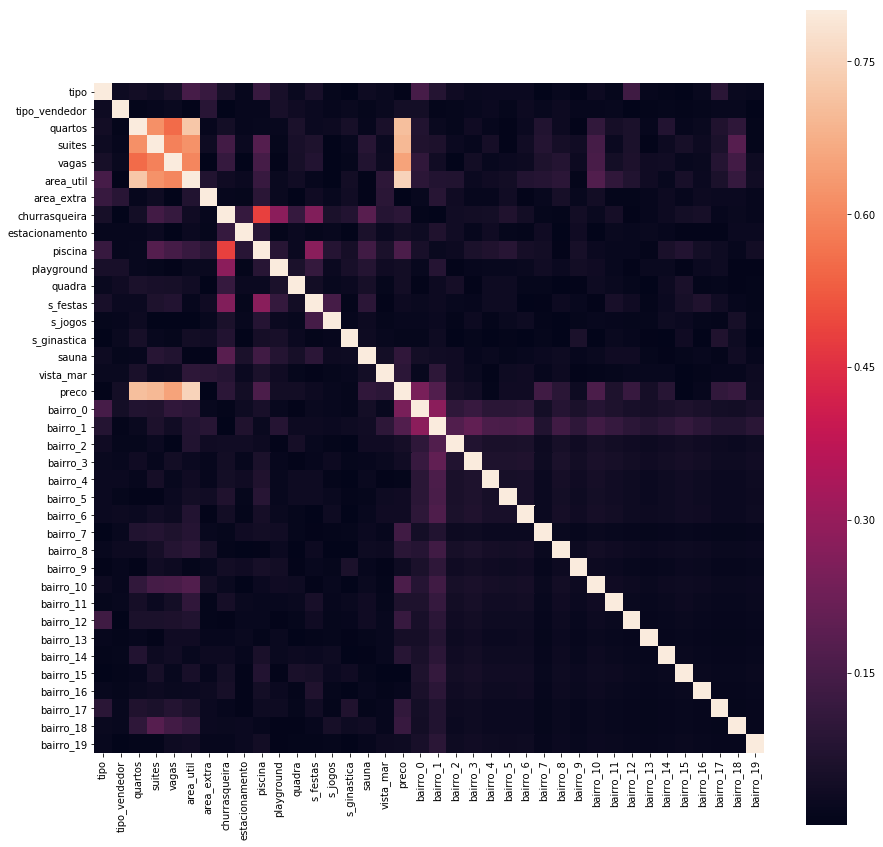

In [55]:
corrmat = abs(train_set.drop(['Id'], axis = 1).corr())
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True)

Como há muitas variáveis até o momento, filtraremos as variáveis cuja correlação está acima de um threshold determinado. 

In [56]:
corr = train_set.corr()
column_names = []
columns = corr.columns
corr_thr = 0.7
for column in columns:
    for row in columns:        
        if column != row and np.abs(corr[column][row]) > corr_thr:            
            if column not in column_names:
                column_names.append(column)
            if row not in column_names:
                column_names.append(row)
#column_names.append('preco')

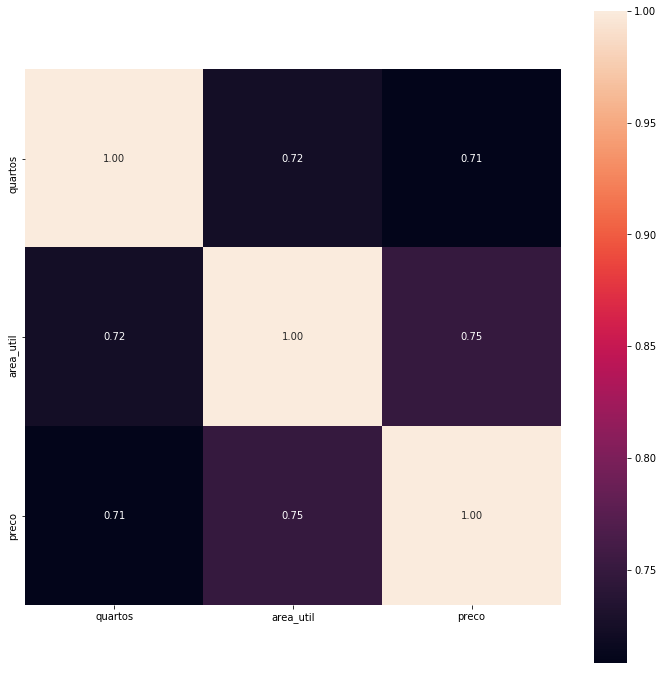

In [57]:
features = column_names
fig, ax = plt.subplots(figsize=(12,12))
corrmat = abs(train_set[features].corr())
cm = abs(np.corrcoef(train_set[features].values.T))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=features, 
                 xticklabels=features)

- As variáveis **quartos** e **suites** parecem ter uma alta correlação entre si. No entanto, a variável quartos possui uma maior correlação com a variável preço. Portanto, removeremos a variável **suites**.
- As variáveis **estacionamento** e **dif_estacionamento visitantes** estão redundantes
- As variáveis **quadra**, **dif_campo_de_futebol** e **dif_quadra_poliesportiva** possuem alta correlação entre si. Como a variável **dif_quadra_poliesportiva** é a que possui a maior correlação com a variável de saída **preço**, ela será mantida.
- As variáveis **s_festas** e **dif_salao de festas** são redundantes.
- As variáveis **s_jogos** e **dif_salao de jogos** são redundantes.
- As variáveis **s_ginastica** e **dif_sala de ginastica** são redundantes.
- As variáveis **vista_mar** e **dif_frente para o mar** são redundantes.

In [ ]:
# drop_by_correlation = ['dif_estacionamento visitantes', 'dif_quadra poliesportiva', 'dif_salao de festas', 'dif_sala de ginastica', 'dif_frente para o mar']
# train_set.drop(drop_by_correlation, axis = 1, inplace = True)
# test_set.drop(drop_by_correlation, axis = 1, inplace = True)

In [58]:
print ('Train shape: ', train_set.shape)
print ('Test shape: ', test_set.shape)

Train shape:  (4186, 39)
Test shape:  (2000, 38)


In [59]:
correlation = abs(train_set.corr())
correlation = correlation[correlation['preco'] < 0.025]
correlation.drop('Id').index

Index(['tipo', 'area_extra', 's_jogos', 's_ginastica', 'bairro_4', 'bairro_15',
       'bairro_16'],
      dtype='object')

In [61]:
train_set.drop(correlation.drop('Id').index, axis = 1, inplace = True)
test_set.drop(correlation.drop('Id').index, axis = 1, inplace = True)

In [62]:
train_set.drop(['Id'], axis = 1).describe()

,tipo_vendedor,quartos,suites,vagas,area_util,churrasqueira,estacionamento,piscina,playground,quadra,...,bairro_8,bairro_9,bairro_10,bairro_11,bairro_12,bairro_13,bairro_14,bairro_17,bairro_18,bairro_19
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,...,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,0.027473,2.916149,1.266364,1.509078,102.214047,0.317009,0.032728,0.557095,0.166985,0.040850,...,0.037506,0.019350,0.036550,0.025800,0.016722,0.012183,0.017439,0.010511,0.009795,0.015767
std,0.163475,0.771903,0.933385,0.765467,50.497648,0.465367,0.177945,0.496789,0.373007,0.197967,...,0.190021,0.137769,0.187678,0.158558,0.128245,0.109717,0.130916,0.101996,0.098493,0.124587
min,0.000000,1.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,1.000000,89.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,1.000000,2.000000,128.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,4.000000,4.000000,388.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  4. Treinamento dos Modelos

In [63]:
train_feat = train_set.drop(['preco', 'Id'], axis = 1).reset_index(drop = True)
test_feat = test_set.drop(['Id'], axis = 1).reset_index(drop = True)
target = train_set['preco'].reset_index(drop = True)

In [64]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [65]:
x_scaler = RobustScaler()
y_scaler = RobustScaler()

x = x_scaler.fit_transform(train_feat)
x_test = x_scaler.transform(test_feat)
y = y_scaler.fit_transform(target.values.reshape(-1, 1))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25)

results = pd.DataFrame([], columns = ['mean', 'std'])
seed = 7
model_predictions = pd.DataFrame()
model_predictions_test = pd.DataFrame()

In [66]:
%%time
n_folds = 10

def rmspe(y, y_pred):
    n = len(y_pred)
    perc_sqr = ((y_pred-y)/y)**2
    sum_perc = np.sum(perc_sqr)
    return np.sqrt( 1/n * sum_perc)

scorer_rmspe = make_scorer(rmspe)

def rmspe_cv(model, features, target, n_folds = 1):
    kf = KFold(n_folds, shuffle=True).get_n_splits(features.values)
    rmse= cross_val_score(model, features.values, target, scoring=scorer_rmspe, cv = kf)
    return (rmse)


Wall time: 0 ns


### Linear Regression

In [67]:
%%time
from sklearn.linear_model import LinearRegression

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = LinearRegression()
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['LinReg'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.016822
RMSPE: 0.018463
RMSPE: 0.017842
RMSPE: 0.017412
RMSPE: 0.018202
RMSPE: 0.018497
RMSPE: 0.018273
RMSPE: 0.045688
RMSPE: 0.016519
RMSPE: 0.018050
0.017787 (+/- 0.000677)
Wall time: 60.8 ms


In [68]:
model_predictions['LinReg'] = best_model.predict(train_feat).ravel()
model_predictions_test['LinReg'] = best_model.predict(test_feat).ravel()

### Lasso Regression

In [69]:
%%time
from sklearn.linear_model import Lasso

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = Lasso(alpha =0.0005)
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['lasso'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.016903
RMSPE: 0.018489
RMSPE: 0.017873
RMSPE: 0.017527
RMSPE: 0.018119
RMSPE: 0.018507
RMSPE: 0.018219
RMSPE: 0.045704
RMSPE: 0.016581
RMSPE: 0.018228
0.017827 (+/- 0.000650)
Wall time: 44.9 ms


In [70]:
%%time
model_predictions['lasso'] = best_model.predict(train_feat).ravel()
model_predictions_test['lasso'] = best_model.predict(test_feat).ravel()

Wall time: 2 ms


### Passive Agressive Regression
Dependente da inicialização

In [71]:
%%time
from sklearn.linear_model import PassiveAggressiveRegressor

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = PassiveAggressiveRegressor(C = 1.0, max_iter = 5, tol = None)
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['PassiveAgressive'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.187795
RMSPE: 0.140721
RMSPE: 0.176834
RMSPE: 0.206141
RMSPE: 0.165720
RMSPE: 0.319591
RMSPE: 0.188789
RMSPE: 0.140301
RMSPE: 0.168457
RMSPE: 0.150855
0.169512 (+/- 0.021466)
Wall time: 44.9 ms


In [72]:
%%time
model_predictions['PassiveAgressive'] = best_model.predict(train_feat).ravel()
model_predictions_test['PassiveAgressive'] = best_model.predict(test_feat).ravel()

Wall time: 1.99 ms


### Elastic Net

In [73]:
%%time
from sklearn.linear_model import ElasticNet

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = ElasticNet(alpha=0.0005, l1_ratio=.9)
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['ElasticNet'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.016893
RMSPE: 0.018483
RMSPE: 0.017867
RMSPE: 0.017516
RMSPE: 0.018122
RMSPE: 0.018504
RMSPE: 0.018220
RMSPE: 0.045702
RMSPE: 0.016573
RMSPE: 0.018209
0.017821 (+/- 0.000652)
Wall time: 47.9 ms


In [74]:
%%time
model_predictions['ElasticNet'] = best_model.predict(train_feat).ravel()
model_predictions_test['ElasticNet'] = best_model.predict(test_feat).ravel()

Wall time: 1.99 ms


### Kernel Ridge Regression

In [75]:
%%time
from sklearn.kernel_ridge import KernelRidge

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['KRR'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.015552
RMSPE: 0.017823
RMSPE: 0.016672
RMSPE: 0.016595
RMSPE: 0.017703
RMSPE: 0.016649
RMSPE: 0.017129
RMSPE: 0.044197
RMSPE: 0.015315
RMSPE: 0.016926
0.016707 (+/- 0.000800)
Wall time: 6.23 s


In [76]:
%%time
model_predictions['KRR'] = model.predict(train_feat).ravel()
model_predictions_test['KRR'] = model.predict(test_feat).ravel()

Wall time: 187 ms


### Gradient Boost

In [77]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber')
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['GBR'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.014218
RMSPE: 0.016160
RMSPE: 0.015162
RMSPE: 0.015909
RMSPE: 0.016344
RMSPE: 0.015257
RMSPE: 0.016104
RMSPE: 0.043759
RMSPE: 0.014232
RMSPE: 0.016108
0.015499 (+/- 0.000780)
Wall time: 1min 5s


In [78]:
%%time
model_predictions['GBR'] = best_model.predict(train_feat).ravel()
model_predictions_test['GBR'] = best_model.predict(test_feat).ravel()

Wall time: 268 ms


### LGBoost

In [81]:
%%time
import lightgbm as lgb

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['LGB'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.014730
RMSPE: 0.016099
RMSPE: 0.016146
RMSPE: 0.016062
RMSPE: 0.016912
RMSPE: 0.016342
RMSPE: 0.017027
RMSPE: 0.044193
RMSPE: 0.014558
RMSPE: 0.016485
0.016040 (+/- 0.000813)
Wall time: 1.64 s


In [82]:
%%time
model_predictions['LGB'] = best_model.predict(train_feat).ravel()
model_predictions_test['LGB'] = best_model.predict(test_feat).ravel()

Wall time: 59.8 ms


### Bayesian Ridge

In [83]:
%%time
from sklearn.linear_model import BayesianRidge

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = BayesianRidge()
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['BayRidge'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.016837
RMSPE: 0.018462
RMSPE: 0.017836
RMSPE: 0.017463
RMSPE: 0.018158
RMSPE: 0.018462
RMSPE: 0.018245
RMSPE: 0.045690
RMSPE: 0.016533
RMSPE: 0.018121
0.017791 (+/- 0.000663)
Wall time: 56.8 ms


In [84]:
%%time
model_predictions['BayRidge'] = best_model.predict(train_feat).ravel()
model_predictions_test['BayRidge'] = best_model.predict(test_feat).ravel()

Wall time: 2 ms


### Support Vector Regression

In [85]:
%%time
from sklearn.svm import SVR

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, 
          tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
          cache_size=200, verbose=False, max_iter=-1)
    
    # Fit the model    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['BayRidge'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.015752
RMSPE: 0.017471
RMSPE: 0.016532
RMSPE: 0.017682
RMSPE: 0.016828
RMSPE: 0.016147
RMSPE: 0.017143
RMSPE: 0.044684
RMSPE: 0.015819
RMSPE: 0.016898
0.016697 (+/- 0.000651)
Wall time: 6.8 s


In [86]:
%%time
model_predictions['SVR'] = best_model.predict(train_feat).ravel()
model_predictions_test['SVR'] = best_model.predict(test_feat).ravel()

Wall time: 514 ms


### Random Forest Regressor

In [87]:
%%time
from sklearn.ensemble import RandomForestRegressor

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
best_score = 999
best_model = None
cvscores = []
for train, val in kfold.split(train_feat, target):
    # create model
    model = RandomForestRegressor(n_estimators = 100)# Fit the model    
    
    model.fit(train_feat.iloc[train], target.values[train])
    
    # evaluate the model    
    predictions = model.predict(train_feat.iloc[val]).ravel()
    rmspe_fold_score = rmspe(target.values[val], predictions)
    
    print("%s: %.6f" % ('RMSPE', rmspe_fold_score))
    cvscores.append(rmspe_fold_score)
    
    if rmspe_fold_score < best_score:
        best_score = rmspe_fold_score
        best_model = model 
    
cvscores.remove(max(cvscores))
print("%.6f (+/- %.6f)" % (np.mean(cvscores), np.std(cvscores)))
results.loc['RandomForest'] = [np.mean(cvscores), np.std(cvscores)]

RMSPE: 0.015641
RMSPE: 0.017080
RMSPE: 0.016686
RMSPE: 0.016567
RMSPE: 0.016990
RMSPE: 0.017440
RMSPE: 0.016828
RMSPE: 0.043901
RMSPE: 0.014634
RMSPE: 0.019348
0.016802 (+/- 0.001208)
Wall time: 8.22 s


In [88]:
%%time
model_predictions['RandomForest'] = best_model.predict(train_feat).ravel()
model_predictions_test['RandomForest'] = best_model.predict(test_feat).ravel()

Wall time: 86.8 ms


In [89]:
results.sort_values(by = 'mean')

,mean,std
GBR,0.015499,0.000780
XGB,0.015891,0.000718
LGB,0.016040,0.000813
BayRidge,0.016697,0.000651
KRR,0.016707,0.000800
RandomForest,0.016802,0.001208
LinReg,0.017787,0.000677
ElasticNet,0.017821,0.000652
lasso,0.017827,0.000650
PassiveAgressive,0.169512,0.021466


### Ensemble

In [90]:
model_predictions[results.sort_values(by = 'mean').index].describe()

,GBR,XGB,LGB,BayRidge,KRR,RandomForest,LinReg,ElasticNet,lasso,PassiveAgressive
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,13.112098,13.110216,13.108448,13.108184,13.109285,13.108763,13.108208,13.108199,13.108200,12.739347
std,0.466884,0.467348,0.457465,0.446125,0.454731,0.481466,0.447191,0.444648,0.444427,2.142216
min,11.694655,10.673050,11.863260,11.965424,11.757959,8.482362,11.964197,11.966996,11.967272,5.925300
25%,12.777785,12.777817,12.773136,12.794870,12.781048,12.765920,12.794375,12.797014,12.796843,11.217467
50%,13.038842,13.044623,13.052292,13.049795,13.065140,13.053805,13.051075,13.049732,13.049628,12.947828
75%,13.441510,13.453060,13.447771,13.367735,13.432786,13.460043,13.369576,13.364272,13.363446,14.150717
max,14.187914,14.183028,14.106630,14.559797,14.295394,14.133748,14.558930,14.571160,14.572075,18.808916


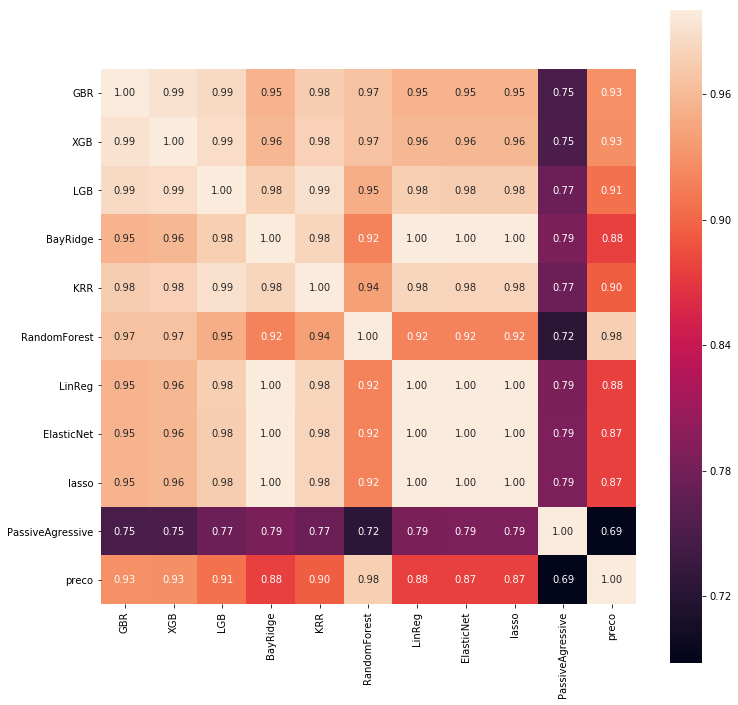

In [91]:
fig, ax = plt.subplots(figsize=(12,12))
df_corr = model_predictions[results.sort_values(by = 'mean').index]
df_corr.reset_index(drop = True, inplace = True)
df_corr['preco'] = train_set['preco'].ravel()
# df_corr['preco_detran'] = np.expm1(train_set['preco'].ravel())
corrmat = abs(df_corr.corr())
cm = abs(np.corrcoef(df_corr.values.T))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=df_corr.columns, 
                 xticklabels=df_corr.columns)

In [92]:
corr_thr = 0.89
model_selection = list(corrmat[corrmat['preco'] > corr_thr].drop(['preco'], axis = 0).index)

In [109]:
print (set(model_selection)-set(model_predictions_test.columns))
model_drop = set(model_selection)-set(model_predictions_test.columns)
print (model_selection)
# model_selection.remove('XGB')
model_selection

{'XGB'}
['GBR', 'XGB', 'LGB', 'KRR', 'RandomForest']


['GBR', 'XGB', 'LGB', 'KRR', 'RandomForest']

In [115]:
model_drop

{'XGB'}

In [113]:
model_selection.remove('XGB')

In [103]:
# Droppando eventuais modelos que tem em um conjunto e não tem no outro
model_predictions.drop(['XGB'], axis=1, inplace = True)

In [116]:
feat_ensemble = model_predictions[model_selection]
feat_ensemble_test = model_predictions_test[model_selection]

In [117]:
ensemble_predictions = feat_ensemble_test.mean(axis=1)

__________

In [118]:
model_predictions_detransformed_rmspe = pd.DataFrame([], columns = ['rmspe'])
model_predictions_detransformed = pd.DataFrame()
for model in model_predictions.columns:
    model_predictions_detransformed[model] = np.expm1(model_predictions[model].ravel())
    model_predictions_detransformed_rmspe.loc[model] = rmspe(model_predictions_detransformed[model], np.expm1(target.ravel()))

model_predictions_detransformed['target'] = np.expm1(target.ravel())
model_predictions_detransformed_rmspe.sort_values(by = 'rmspe')

,rmspe
RandomForest,0.114923
GBR,0.176569
SVR,0.190834
LGB,0.210657
KRR,0.224120
BayRidge,0.247801
ElasticNet,0.247843
lasso,0.247878
LinReg,0.247937
PassiveAgressive,29.837965


In [119]:
model_predictions_detransformed_test = pd.DataFrame()
for model in model_predictions.columns:
    model_predictions_detransformed_test[model] = np.expm1(model_predictions_test[model].ravel())    


In [120]:
rmse_thr = 4 #0.23
model_selection = model_predictions_detransformed_rmspe[model_predictions_detransformed_rmspe['rmspe'] > rmse_thr].axes[0].ravel()
feat_ensemble = model_predictions_detransformed.drop(model_selection, axis = 1)
feat_ensemble_test = model_predictions_detransformed_test.drop(model_selection, axis = 1)

In [121]:
feat_ensemble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 10 columns):
LinReg          4186 non-null float64
lasso           4186 non-null float64
ElasticNet      4186 non-null float64
KRR             4186 non-null float64
GBR             4186 non-null float64
LGB             4186 non-null float64
BayRidge        4186 non-null float64
SVR             4186 non-null float64
RandomForest    4186 non-null float64
target          4186 non-null float64
dtypes: float64(10)
memory usage: 327.1 KB


In [122]:
feat_ensemble_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
LinReg          2000 non-null float64
lasso           2000 non-null float64
ElasticNet      2000 non-null float64
KRR             2000 non-null float64
GBR             2000 non-null float64
LGB             2000 non-null float64
BayRidge        2000 non-null float64
SVR             2000 non-null float64
RandomForest    2000 non-null float64
dtypes: float64(9)
memory usage: 140.7 KB


In [123]:
%%time

model_ensemble = RandomForestRegressor(n_estimators = 100)

score = rmspe_cv(model_ensemble, feat_ensemble.drop(['target'], axis = 1), feat_ensemble['target'].ravel(), n_folds)
print (score)
print ([score.mean(), score.std()])

[ 0.14182223  0.12935514  0.14216115  0.1282877   0.12890112  0.11163941
  0.12411112  0.11801991 12.88657466  0.14328154]
[1.405415397187675, 3.8270659325601604]
Wall time: 16.6 s


In [124]:
%%time
from sklearn.model_selection import KFold

# fix random seed for reproducibility
np.random.seed(seed)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
cvscores = []
best_model_ensemble = None
best_score_ensemble = 999
metric_index = 0

for train, val in kfold.split(train_feat, target):
  # create model    
    model_ensemble.fit(feat_ensemble.drop(['target'], axis = 1).iloc[train], 
                       feat_ensemble['target'].ravel()[train])
    
    # evaluate the model
    predictions = model_ensemble.predict(feat_ensemble.drop(['target'], axis = 1).iloc[val])
    rmspe_fold = rmspe(predictions, feat_ensemble['target'].ravel()[val])
        
    cvscores.append(rmspe_fold)
    
    print (rmspe_fold)
    
    # Saving best model
    if rmspe_fold is not None and rmspe_fold < best_score_ensemble:
        best_model_ensemble = model_ensemble
        best_score_ensemble = rmspe_fold
    
#results.loc['Perceptron'] = [np.nanmean(cvscores), np.nanstd(cvscores)]
print("%.6f (+/- %.6f)" % (np.nanmean(cvscores), np.nanstd(cvscores)))

0.10850660191643721
0.1102202814289189
0.1382203554513633
0.10773276802968686
0.10880599327049836
0.10702475866568187
0.115286718459015
0.11017695977237103
0.22599788408792423
0.175440881916784
0.130741 (+/- 0.037786)
Wall time: 16.4 s


In [125]:
ensemble_predictions = model_predictions_detransformed_test['RandomForest'].ravel()

In [126]:
%%time
ensemble_predictions = best_model_ensemble.predict(feat_ensemble_test).ravel()

Wall time: 31.9 ms


## 5. Submissão

In [127]:
submission = pd.DataFrame()
submission['Id'] = test_set['Id']

#predictions = ensemble_predictions
final_predictions = ensemble_predictions#np.expm1(predictions)# * neighborhood_test/100

submission['preco'] = final_predictions

submission.to_csv('submission.csv', index=False)

_________________